# **S15 T01: Aprenentatge No Supervisat (Classifica els diferents vols)**


In [1]:
# Imoporting packages
# ==============================================================================
import pandas as pd 
import datetime as dt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
from scipy import stats
import math

from kneed import KneeLocator
from imblearn import under_sampling

from sklearn import preprocessing as prp
from sklearn import model_selection as ms
from sklearn.decomposition import PCA
from sklearn import dummy
from sklearn import cluster
from sklearn import metrics
from mpl_toolkits.mplot3d.axes3d import Axes3D
import sklearn.pipeline as pipeline 

# Pandas Configuration
# ==============================================================================
pd.set_option('float_format', '{:.2f}'.format) # float numbers with 2 decimals
pd.set_option("display.max_columns", None) # Display all columns

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

## **Importing the data**  
Import the dataset "Flights_Ready.csv". This dataset is the ready to use version of the dataset "DelayedFlights.cvs" as it has been previously analized and transformed to use in this project.  
You can see the transformations applied in [This notebook](https://github.com/Jahdry/Data_Science_Submits/blob/main/Sprint12/Flights_DB_preprocess.ipynb)


In [2]:
flights_ready = pd.read_csv('../db/Flights/Flights_Ready.csv', index_col=0)

In [3]:
flights_ready

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,0,0,0,0
1,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,0,0,0,0
2,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,0,0,0,0
4,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,2,0,0,0,32
5,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101,115,87,11,25,IND,JAX,688,4,10,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,1250,1220,1617,1552,DL,1621,N938DL,147,152,120,25,30,MSP,ATL,906,9,18,3,0,0,0,22
7009717,12,13,6,657,600,904,749,DL,1631,N3743H,127,109,78,75,57,RIC,ATL,481,15,34,0,57,18,0,0
7009718,12,13,6,1007,847,1149,1010,DL,1631,N909DA,162,143,122,99,80,ATL,IAH,689,8,32,1,0,19,0,79
7009726,12,13,6,1251,1240,1446,1437,DL,1639,N646DL,115,117,89,9,11,IAD,ATL,533,13,13,0,0,0,0,0


## **Making an undersampling of the Data**
For this practice we are going to balance the dataset using the attribute "Unique Carrier".

In [4]:
X = flights_ready.drop('UniqueCarrier', axis=1)
y = flights_ready['UniqueCarrier']

sampler = under_sampling.RandomUnderSampler(sampling_strategy= 'not minority', random_state=42)
X_res, y_res = sampler.fit_resample(X, y)

[]

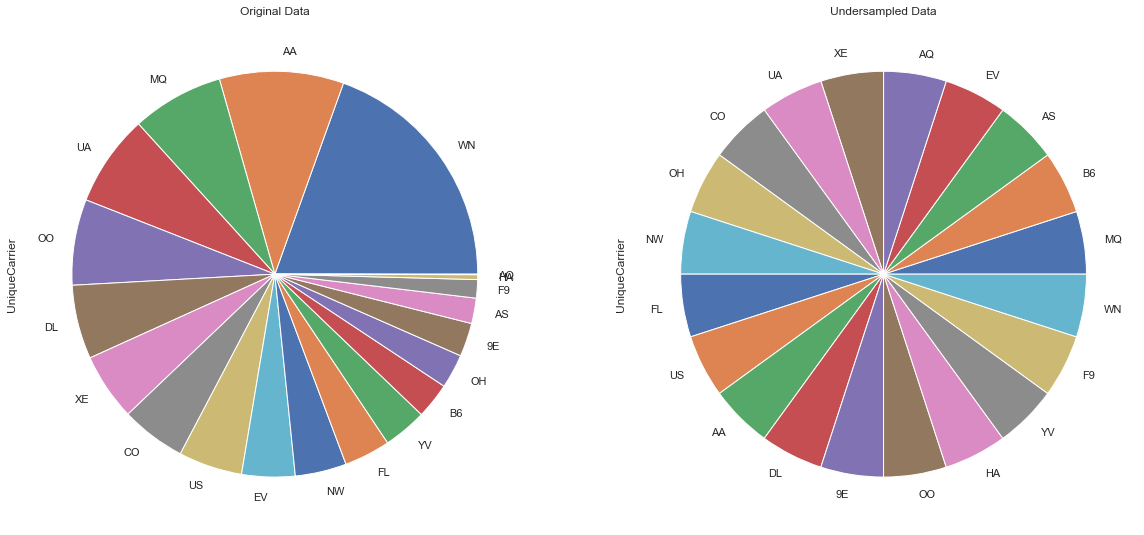

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
y.value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Original Data')
y_res.value_counts().plot.pie(ax=ax[1])
ax[1].set_title('Undersampled Data')
plt.plot()


In [6]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14880 entries, 0 to 14879
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              14880 non-null  int64 
 1   DayofMonth         14880 non-null  int64 
 2   DayOfWeek          14880 non-null  int64 
 3   DepTime            14880 non-null  int64 
 4   CRSDepTime         14880 non-null  int64 
 5   ArrTime            14880 non-null  int64 
 6   CRSArrTime         14880 non-null  int64 
 7   FlightNum          14880 non-null  int64 
 8   TailNum            14880 non-null  object
 9   ActualElapsedTime  14880 non-null  int64 
 10  CRSElapsedTime     14880 non-null  int64 
 11  AirTime            14880 non-null  int64 
 12  ArrDelay           14880 non-null  int64 
 13  DepDelay           14880 non-null  int64 
 14  Origin             14880 non-null  object
 15  Dest               14880 non-null  object
 16  Distance           14880 non-null  int64

In [7]:
# Dropping the Categorical Attributes
# ====================================================================

dropping_attributes = ['TailNum', 'Origin', 'Dest', 'FlightNum']
flights_und = X_res.drop(dropping_attributes, axis=1)
flights_und

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,7,31,4,2135,2125,2315,2259,160,154,116,16,10,812,5,39,0,0,6,0,10
1,12,22,1,1404,1355,1536,1543,92,108,71,-7,9,449,7,14,0,0,0,0,0
2,12,7,7,907,854,1134,1113,147,139,121,21,13,706,15,11,13,0,8,0,0
3,12,24,3,2212,2155,2313,2258,61,63,44,15,17,163,6,11,0,15,0,0,0
4,4,3,4,826,800,1049,1030,143,150,104,19,26,587,9,30,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14875,3,31,1,1459,1445,1640,1610,101,85,77,30,14,313,3,21,30,0,0,0,0
14876,12,17,3,740,730,828,805,48,35,36,23,10,100,4,8,23,0,0,0,0
14877,4,11,5,1832,1621,2001,1759,89,98,69,122,131,409,3,17,0,0,122,0,0
14878,10,5,7,1520,1440,1655,1604,95,84,65,51,40,369,5,25,51,0,0,0,0


## **Correlation matrix**

Text(0.5, 0.98, 'Correlation Matrix')

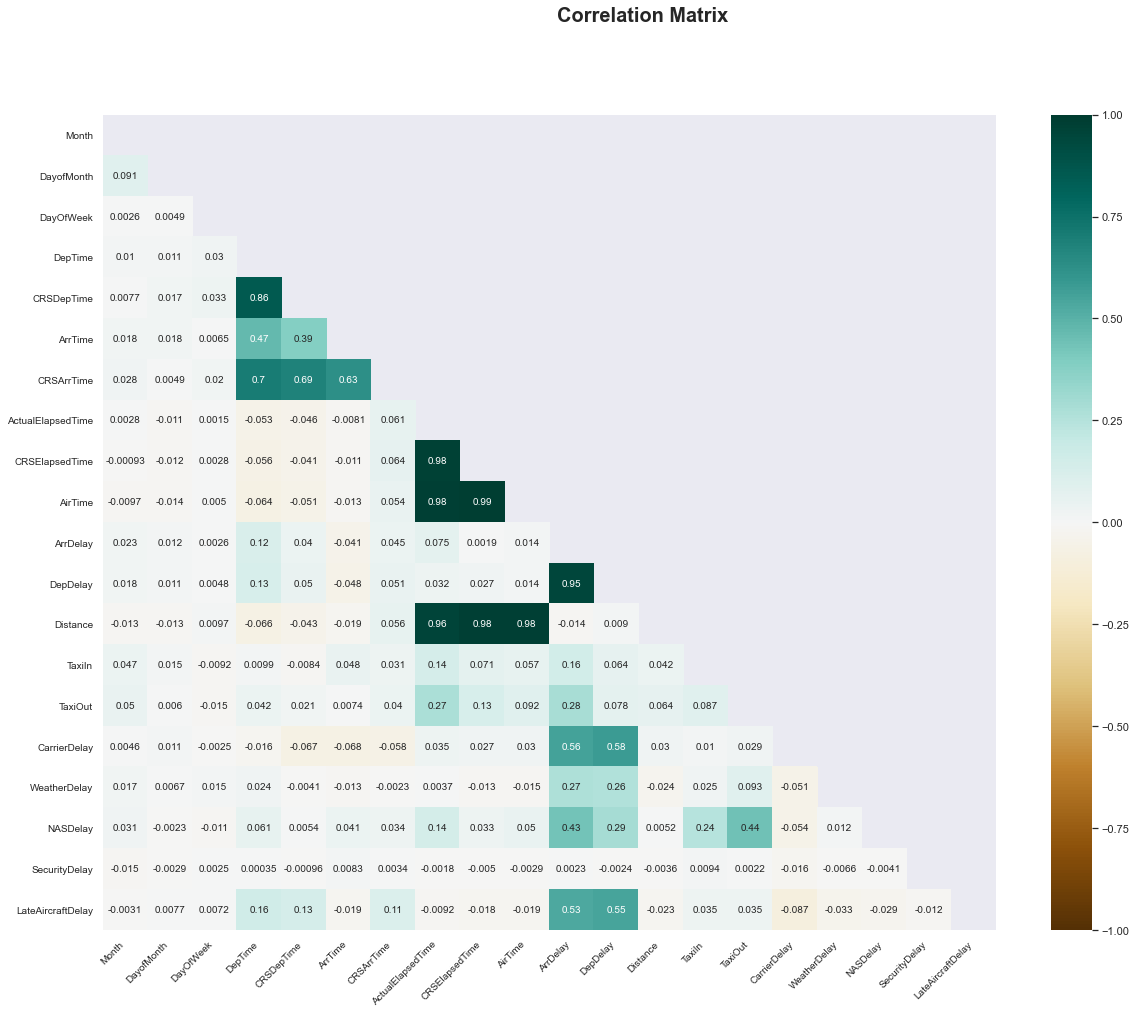

In [8]:
# Making a correlation matrix
# ==============================================================================

flights_corr = flights_und.corr(method='pearson')

# Heatmap matrix of correlations
# ==============================================================================

# Getting the Upper Triangle of the co-relation matrix
mask_matrix = np.triu(flights_corr, k=0) # This will be applied as a mask

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))
sns.heatmap(flights_corr, annot=True, mask=mask_matrix, cmap="BrBG", vmin=-1, vmax=1, annot_kws = {"size": 10})
# Setting the plotting parameters
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, horizontalalignment = 'right')
ax.tick_params(labelsize = 10)
fig.suptitle('Correlation Matrix', fontsize = 20, fontweight = "bold")

In [9]:
# Getting the Hihg correlated Attributes
# =====================================================================
high_corr = flights_corr[(flights_corr >= 0.8) | (flights_corr<=-0.8)] 
high_corr[(high_corr<1)].stack()

DepTime            CRSDepTime          0.86
CRSDepTime         DepTime             0.86
ActualElapsedTime  CRSElapsedTime      0.98
                   AirTime             0.98
                   Distance            0.96
CRSElapsedTime     ActualElapsedTime   0.98
                   AirTime             0.99
                   Distance            0.98
AirTime            ActualElapsedTime   0.98
                   CRSElapsedTime      0.99
                   Distance            0.98
ArrDelay           DepDelay            0.95
DepDelay           ArrDelay            0.95
Distance           ActualElapsedTime   0.96
                   CRSElapsedTime      0.98
                   AirTime             0.98
dtype: float64

Highly correlated Attributes must be deleted in order improve the perfomance and Runtime of the algorithms.  
"CRS" Attributes will prevail over "Actual Time" Attributes as thei are te ones that can be know before a flight, hence more useful to predict if the flight will be late.

In [10]:
# Dropping Selected Attributes (Hig + Low Correlation)
# ==================================================================

high_corr_drop = ["ActualElapsedTime", "AirTime", "Distance", "DepTime", 'ArrDelay']

attributes_drop = list(high_corr_drop)
flights_und = flights_und.drop(columns=attributes_drop)
flights_und

,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,CRSElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,7,31,4,2125,2315,2259,154,10,5,39,0,0,6,0,10
1,12,22,1,1355,1536,1543,108,9,7,14,0,0,0,0,0
2,12,7,7,854,1134,1113,139,13,15,11,13,0,8,0,0
3,12,24,3,2155,2313,2258,63,17,6,11,0,15,0,0,0
4,4,3,4,800,1049,1030,150,26,9,30,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14875,3,31,1,1445,1640,1610,85,14,3,21,30,0,0,0,0
14876,12,17,3,730,828,805,35,10,4,8,23,0,0,0,0
14877,4,11,5,1621,2001,1759,98,131,3,17,0,0,122,0,0
14878,10,5,7,1440,1655,1604,84,40,5,25,51,0,0,0,0


## **Generating the KMeans model**

In [11]:
# Generating the model
# ================================================
k_means = cluster.KMeans( init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42, n_jobs=2)
k_means.fit(flights_und)

# Showing the model scorers
# ================================================
unique, counts = np.unique(k_means.labels_, return_counts=True)
unique_counts = dict(zip(unique,counts))
print(f'Inertia: {k_means.inertia_} \nIterations: {k_means.n_iter_}')
print(f'Unique Counts: {unique_counts}')
print(f'Silhouette Score: {metrics.silhouette_score(flights_und, k_means.labels_)}')

Inertia: 708231592.5251055 
Iterations: 30
Unique Counts: {0: 506, 1: 589, 2: 2407, 3: 2214, 4: 1714, 5: 2271, 6: 2118, 7: 1732, 8: 367, 9: 962}
Silhouette Score: 0.35800948576316316


## **Choosing the optimal number of clusters**

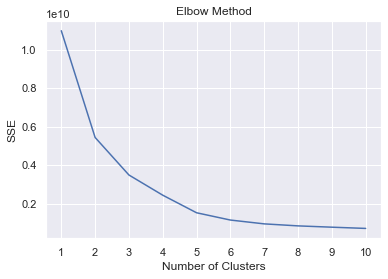

In [12]:
# Elbow Method
# ===============================================

sse = []
for k in range (1,11):
    k_means_opt = cluster.KMeans(n_clusters= k, max_iter=300, n_init=10, random_state=42)
    k_means_opt.fit(flights_und)
    sse.append(k_means_opt.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('Elbow Method')
plt.show()

In [13]:
# Determining the elbow by the module "Kneed"
# ==========================================================================
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

## **Dimensional Reduction with PCA**


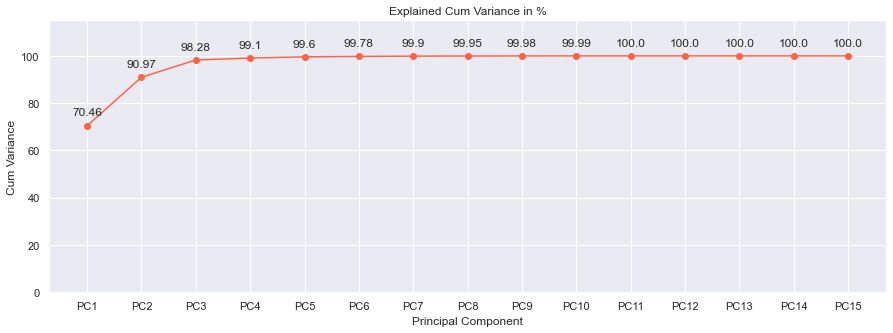

In [14]:
# Appliing PC to the dataset
# ================================================================

pca = PCA(random_state=42)
pca.fit(flights_und)

# Ploting the cumulate variance for each PC
# =================================================================

index = []
x=0
for i in pca.components_:
    index.append(f"PC{1+x}")
    x+=1

cum_var  = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
ax.plot(index, cum_var*100, marker = 'o', color='tomato')

for z,h in zip(index, cum_var*100):
    label = round(h, 2)
    ax.annotate(
        label,
        (z,h),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 115)
ax.set_xticks(np.arange(pca.n_components_))
ax.set_title('Explained Cum Variance in %',)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cum Variance');

In [15]:
# Aplliing the PCA with 3 PCs
# ===============================================================================
pca = PCA(3, random_state=42)
flights_pca = pd.DataFrame(pca.fit_transform(flights_und))

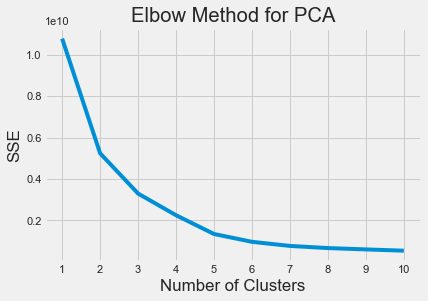

In [16]:
# Elbow Method
# ===============================================

#Generating the models
sse_pca = []
for k in range (1,11):
    k_means_opt = cluster.KMeans(n_clusters= k, max_iter=300, n_init=10, random_state=42)
    k_means_opt.fit(flights_pca)
    sse_pca.append(k_means_opt.inertia_)

#Plotting the results
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse_pca)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('Elbow Method for PCA')
plt.show()

In [17]:
# Determining the elbow by the module "Kneed"
# ==========================================================================

kl = KneeLocator(range(1, 11), sse_pca, curve="convex", direction="decreasing")
kl.elbow

3


## Nivell 3

- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

## **Clustering performance by Silhouette score**

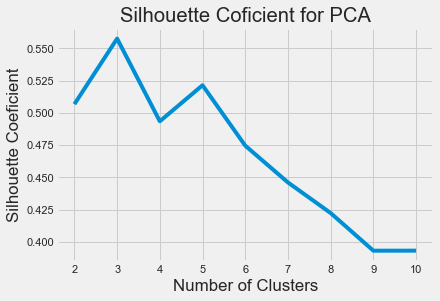

In [18]:
# Silhouete method for PCA dataframe
# =================================================================
sil_coef = []
for k in range (2,11):
    k_means_opt = cluster.KMeans(n_clusters= k, max_iter=300, n_init=10, random_state=42)
    k_means_opt.fit(flights_pca)
    sil = metrics.silhouette_score(flights_pca, k_means_opt.labels_)
    sil_coef.append(sil)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sil_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coeficient")
plt.title('Silhouette Coficient for PCA')
plt.show()

Both Elbow Method for "Inertia" and Silhouette coeficient marks that the optimum number of clusters is 3.  
In the Silhouet coeficient its also observable that k=5 also is a sweet spot. 

## **Plotting the optimum indexes of K (3, 5)**

In [19]:
#Generating the Dataframes with the labels for each K
#======================================================================

k_means_3 = cluster.KMeans(n_clusters= 3, max_iter=300, n_init=10, random_state=42)
label_pca_3 = k_means_3.fit_predict(flights_pca)
flights_pca['label_3'] = label_pca_3

k_means_5 = cluster.KMeans(n_clusters= 5, max_iter=300, n_init=10, random_state=42)
label_pca_5 = k_means_5.fit_predict(flights_pca)
flights_pca['label_5'] = label_pca_5

flights_pca

,0,1,2,label_3,label_5
0,-1159.18,121.80,115.32,0,1
1,131.03,-49.30,-18.59,1,4
2,879.01,-223.03,-108.78,1,0
3,-1170.46,142.51,139.07,0,1
4,1009.33,-223.13,-102.69,1,0
...,...,...,...,...,...
14875,-18.33,-43.09,14.38,0,4
14876,1322.42,-180.69,-28.07,1,0
14877,-427.07,-134.10,102.21,0,1
14878,-22.48,-58.18,19.35,0,4


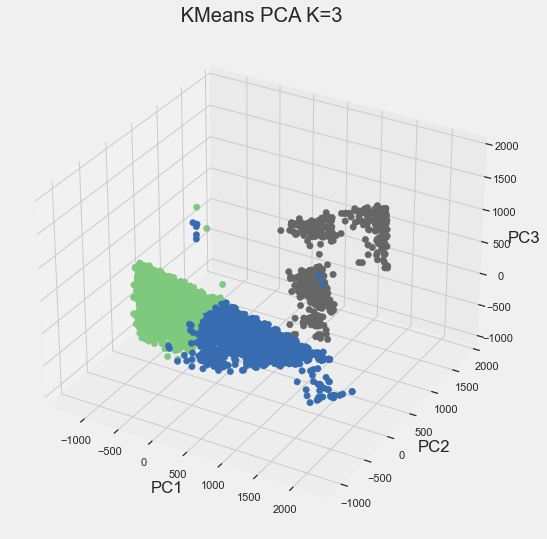

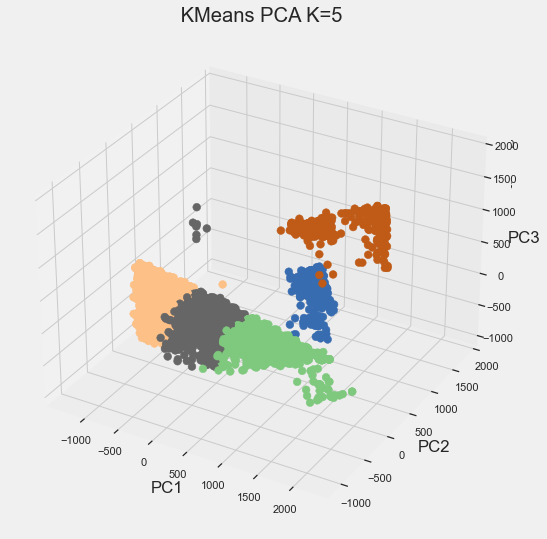

In [33]:
# Visualizing the Clusters
# ======================================================================

fig = plt.figure(figsize=(7,14))
ax = Axes3D(fig)

# plot
scatter = ax.scatter(flights_pca[0], flights_pca[1], flights_pca[2], s=40, c=flights_pca['label_3'], marker='o', alpha=1, cmap='Accent')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(' KMeans PCA K=3')
plt.show()

fig = plt.figure(figsize=(7,14))
ax = Axes3D(fig)
ax = Axes3D(fig)
scatter = ax.scatter(flights_pca[0], flights_pca[1], flights_pca[2], s=60, c=flights_pca['label_5'], marker='o', alpha=1, cmap='Accent')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(' KMeans PCA K=5')
plt.show()


## Nivell 2

- Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

## **Scaling Attributes**

In [34]:
# Standarizing dependent attributes with StandardScaler. 
# ==========================================================================================
# As the target is binary (Late/ On Time) there is no need to scale this Attribute. 

scaler = prp.StandardScaler()
flights_und_sc = scaler.fit_transform(flights_und)
flights_norm = prp.normalize(flights_und_sc)

# Aplliing the PCA with 3 PCs
# ===============================================================================
pca = PCA(3, random_state=42)
flights_norm_pca = pd.DataFrame(pca.fit_transform(flights_norm))

flights_norm_pca.describe()

,0,1,2
count,14880.00,14880.00,14880.00
mean,0.00,-0.00,0.00
std,0.46,0.35,0.34
min,-0.92,-0.92,-0.85
25%,-0.38,-0.25,-0.26
50%,-0.04,-0.02,0.01
75%,0.39,0.24,0.27
max,0.98,0.92,0.86


## **Making a Dendogram for observing the different K levels**

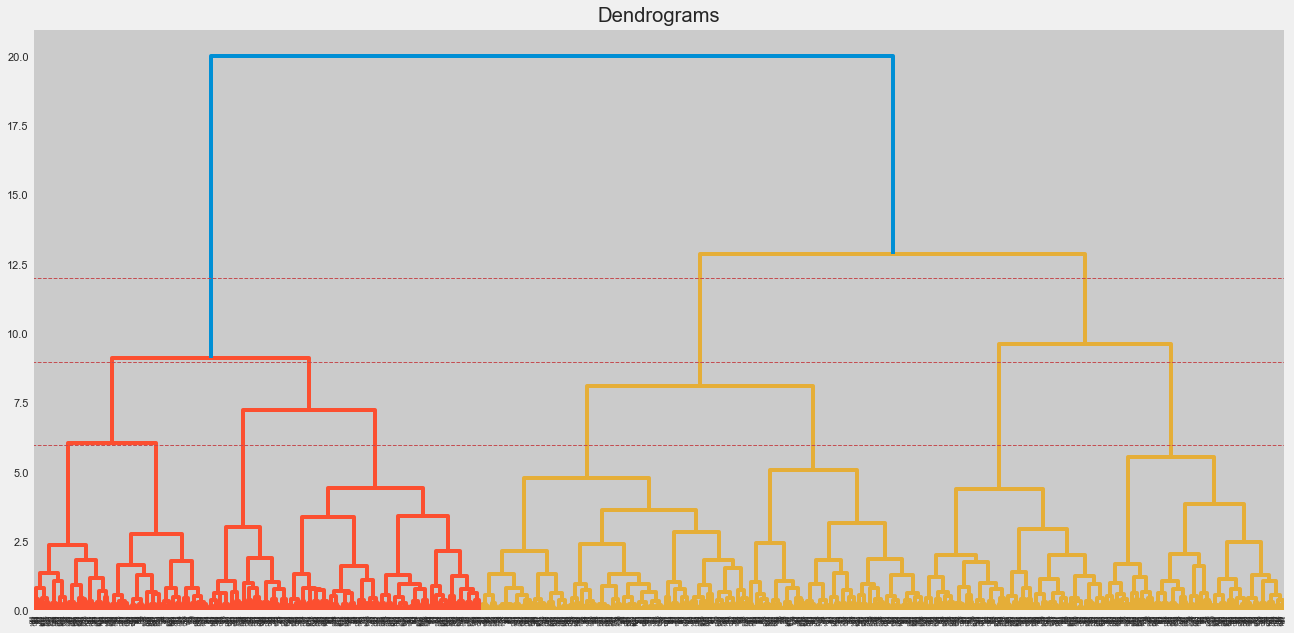

In [35]:
# Plotting the dendogram
fig = plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(flights_norm_pca.sample(frac=0.1, random_state=42), method='ward'))

# Defining lines for different distances
plt.axhline(y=12, color='r', linestyle='--', lw=1)
plt.axhline(y=9, color='r', linestyle='--', lw=1)
plt.axhline(y=6, color='r', linestyle='--', lw=1)

plt.show()

For the slected distances the number of clusters are K=3, K=5 and K=8

## **Appling the Aglomerative Clustering Algorithm for selected Distances (12, 9, 6)**

In [36]:
# Appliing the algorithm and creating the dataframe to plot the clusters
# =================================================================
for k in [3,5,8]:
    agg_clust = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    predict = agg_clust.fit_predict(flights_norm_pca)
    flights_norm_pca[f'label_{k}'] = predict

flights_norm_pca

,0,1,2,label_3,label_5,label_8
0,-0.70,-0.42,-0.04,1,4,3
1,0.15,-0.69,0.37,1,2,1
2,0.53,-0.13,-0.36,0,1,6
3,-0.67,-0.47,-0.02,1,4,3
4,0.78,0.39,0.15,0,3,0
...,...,...,...,...,...,...
14875,0.05,-0.25,0.33,1,2,1
14876,0.77,-0.32,-0.04,0,3,0
14877,-0.17,0.10,0.00,1,2,1
14878,0.02,0.09,-0.49,0,1,4


## **Visualizing the Clusters for Hierachical Clustering**

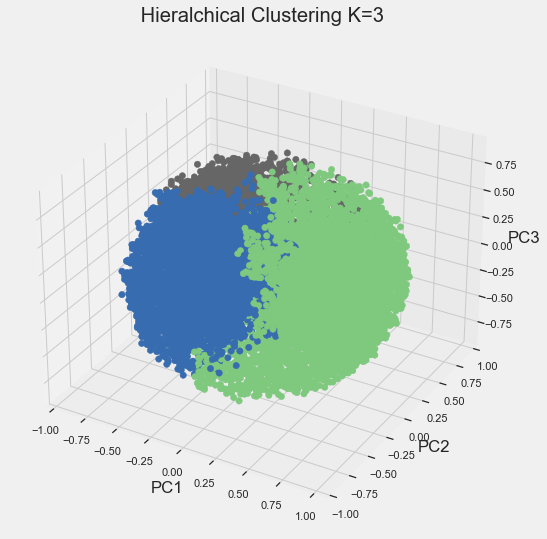

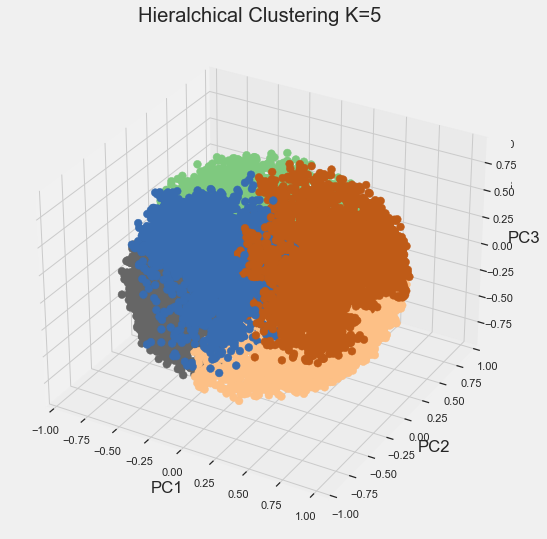

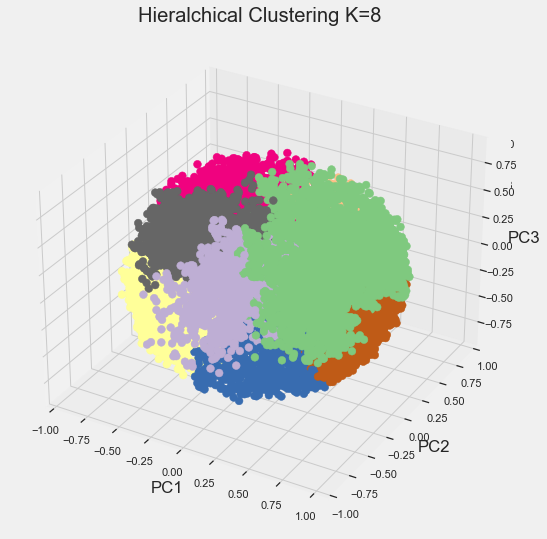

In [37]:
# Generating the plots
# ==============================================================

fig = plt.figure(figsize=(7,14))
ax = Axes3D(fig)

# plot 1
ax.scatter(flights_norm_pca[0], flights_norm_pca[1], flights_norm_pca[2], s=40, c=flights_norm_pca['label_3'], marker='o', alpha=1, cmap='Accent')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(' Hieralchical Clustering K=3')

plt.show()

# plot 2
fig = plt.figure(figsize=(7,14))
ax = Axes3D(fig)
ax = Axes3D(fig)
ax.scatter(flights_norm_pca[0], flights_norm_pca[1], flights_norm_pca[2], s=60, c=flights_norm_pca['label_5'], marker='o', alpha=1, cmap='Accent')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Hieralchical Clustering K=5')
plt.show()

# plot 3
fig = plt.figure(figsize=(7,14))
ax = Axes3D(fig)
ax = Axes3D(fig)
ax.scatter(flights_norm_pca[0], flights_norm_pca[1], flights_norm_pca[2], s=60, c=flights_norm_pca['label_8'], marker='o', alpha=1, cmap='Accent')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Hieralchical Clustering K=8')

plt.show()
